<a href="https://colab.research.google.com/github/JayaVishal23/Bird-Sound-Classification/blob/main/Bird_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/bird_spectrograms.zip' -d spectograms

Archive:  /content/bird_spectrograms.zip
   creating: spectograms/Acridotheres_tristis/
   creating: spectograms/Alcedo_atthis/
   creating: spectograms/Amaurornis_phoenicurus/
   creating: spectograms/Ardeola_grayii/
   creating: spectograms/Argya_striata/
   creating: spectograms/Centropus_sinensis/
   creating: spectograms/Cinnyris_asiaticus/
   creating: spectograms/Columba_livia/
   creating: spectograms/Coracias_benghalensis/
   creating: spectograms/Dendrocitta_vagabunda/
   creating: spectograms/Dicrurus_macrocercus/
   creating: spectograms/Eudynamys_scolopaceus/
   creating: spectograms/Halcyon_smyrnensis/
   creating: spectograms/Merops_orientalis/
   creating: spectograms/Milvus_migrans/
   creating: spectograms/Orthotomus_sutorius/
   creating: spectograms/Ortygornis_pondicerianus/
   creating: spectograms/Passer_domesticus/
   creating: spectograms/Pavo_cristatus/
   creating: spectograms/Prinia_socialis/
   creating: spectograms/Psilopogon_haemacephalus/
   creating: spe

In [ ]:
!unzip '/content/spectrograms_test.zip' -d test

Archive:  /content/spectrograms_test.zip
   creating: test/Acridotheres_tristis/
   creating: test/Alcedo_atthis/
   creating: test/Amaurornis_phoenicurus/
   creating: test/Ardeola_grayii/
   creating: test/Argya_striata/
   creating: test/Centropus_sinensis/
   creating: test/Cinnyris_asiaticus/
   creating: test/Columba_livia/
   creating: test/Coracias_benghalensis/
   creating: test/Dendrocitta_vagabunda/
   creating: test/Dicrurus_macrocercus/
   creating: test/Eudynamys_scolopaceus/
   creating: test/Halcyon_smyrnensis/
   creating: test/Merops_orientalis/
   creating: test/Milvus_migrans/
   creating: test/Orthotomus_sutorius/
   creating: test/Ortygornis_pondicerianus/
   creating: test/Passer_domesticus/
   creating: test/Pavo_cristatus/
   creating: test/Prinia_socialis/
   creating: test/Psilopogon_haemacephalus/
   creating: test/Psittacula_krameri/
   creating: test/Pycnonotus_cafer/
   creating: test/Spilopelia_chinensis/
   creating: test/Sturnia_pagodarum/
   creating:

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tqdm import tqdm

src_dir = "/content/spectograms"
dst_dir = "expanded_dataset"
os.makedirs(dst_dir, exist_ok=True)

# create more training samples
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Loop through each class folder
for cls in os.listdir(src_dir):
    cls_path = os.path.join(src_dir, cls)
    if not os.path.isdir(cls_path):
        continue

    # Create output folder for this class
    dst_cls_path = os.path.join(dst_dir, cls)
    os.makedirs(dst_cls_path, exist_ok=True)

    images = os.listdir(cls_path)
    n_images = len(images)

    # Target: make dataset 5x bigger for each class
    target_total = n_images * 5

    print(f"Class {cls}: {n_images} → {target_total} images")

    # Copy original images first
    for img_name in images:
        src_img = os.path.join(cls_path, img_name)
        dst_img = os.path.join(dst_cls_path, img_name)
        if not os.path.exists(dst_img):
            os.system(f"cp '{src_img}' '{dst_img}'")

    # Keep generating augmented images until target count is reached
    i = 0
    while len(os.listdir(dst_cls_path)) < target_total:
        img_name = images[i % n_images]
        img_path = os.path.join(cls_path, img_name)

        # Load image and convert to array
        img = load_img(img_path)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0) # add batch dimension

        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=dst_cls_path,
                                  save_prefix="aug",
                                  save_format="png"):
            break

        i += 1

    print(f"Finished {cls}: {len(os.listdir(dst_cls_path))} images total")

print("\nDataset expansion complete! Check 'expanded_dataset/' folder.")


Class Pavo_cristatus: 40 → 200 images
Finished Pavo_cristatus: 200 images total
Class Upupa_epops: 40 → 200 images
Finished Upupa_epops: 200 images total
Class Amaurornis_phoenicurus: 40 → 200 images
Finished Amaurornis_phoenicurus: 200 images total
Class Cinnyris_asiaticus: 40 → 200 images
Finished Cinnyris_asiaticus: 200 images total
Class Merops_orientalis: 13 → 65 images
Finished Merops_orientalis: 65 images total
Class Tyto_alba: 40 → 200 images
Finished Tyto_alba: 200 images total
Class Dicrurus_macrocercus: 40 → 200 images
Finished Dicrurus_macrocercus: 200 images total
Class Columba_livia: 40 → 200 images
Finished Columba_livia: 200 images total
Class Ortygornis_pondicerianus: 22 → 110 images
Finished Ortygornis_pondicerianus: 110 images total
Class Ardeola_grayii: 12 → 60 images
Finished Ardeola_grayii: 60 images total
Class Orthotomus_sutorius: 40 → 200 images
Finished Orthotomus_sutorius: 200 images total
Class Halcyon_smyrnensis: 40 → 200 images
Finished Halcyon_smyrnensis:

In [ ]:
import os
import shutil
import random

src_dir = "/content/expanded_dataset"
dst_dir = "dataset_new"

train_ratio = 0.8

for split in ["train", "test"]:
    for cls in os.listdir(src_dir):
        os.makedirs(os.path.join(dst_dir, split, cls), exist_ok=True)


# Go through each class folder and split images
for cls in os.listdir(src_dir):
    cls_path = os.path.join(src_dir, cls)

    # Get all images from this class
    images = os.listdir(cls_path)

    # Shuffle so that train/test gets random samples
    random.shuffle(images)

    n_total = len(images)
    n_train = int(train_ratio * n_total)

    # Split file names into train and test
    train_files = images[:n_train]
    test_files = images[n_train:]

    # Copy training images
    for f in train_files:
        shutil.copy(os.path.join(cls_path, f), os.path.join(dst_dir, "train", cls, f))

    # Copy testing images
    for f in test_files:
        shutil.copy(os.path.join(cls_path, f), os.path.join(dst_dir, "test", cls, f))

    print(f"Class {cls}: {len(train_files)} train, {len(test_files)} test")

print("Dataset split into train/test successfully!")


Class Pavo_cristatus: 160 train, 40 test
Class Upupa_epops: 160 train, 40 test
Class Amaurornis_phoenicurus: 160 train, 40 test
Class Cinnyris_asiaticus: 160 train, 40 test
Class Merops_orientalis: 52 train, 13 test
Class Tyto_alba: 160 train, 40 test
Class Dicrurus_macrocercus: 160 train, 40 test
Class Columba_livia: 160 train, 40 test
Class Ortygornis_pondicerianus: 88 train, 22 test
Class Ardeola_grayii: 48 train, 12 test
Class Orthotomus_sutorius: 160 train, 40 test
Class Halcyon_smyrnensis: 160 train, 40 test
Class Acridotheres_tristis: 160 train, 40 test
Class Prinia_socialis: 160 train, 40 test
Class Argya_striata: 160 train, 40 test
Class Alcedo_atthis: 116 train, 29 test
Class Coracias_benghalensis: 160 train, 40 test
Class Milvus_migrans: 160 train, 40 test
Class Vanellus_indicus: 160 train, 40 test
Class Spilopelia_chinensis: 160 train, 40 test
Class Pycnonotus_cafer: 160 train, 40 test
Class Psittacula_krameri: 160 train, 40 test
Class Centropus_sinensis: 160 train, 40 test

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

data_dir = "/content/dataset_new"   # structure: dataset/train/classX/
train_dir = os.path.join(data_dir, "train")
val_dir   = os.path.join(data_dir, "test")

img_size = (224, 224)
batch_size = 16   # smaller batch
epochs_stage1 = 15
epochs_stage2 = 20


In [3]:
test_dir = os.path.join("/content", "test")

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)
val_ds = keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 4144 files belonging to 28 classes.
Found 1036 files belonging to 28 classes.


In [5]:
test_ds = keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 1048 files belonging to 28 classes.


In [6]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

Classes: ['Acridotheres_tristis', 'Alcedo_atthis', 'Amaurornis_phoenicurus', 'Ardeola_grayii', 'Argya_striata', 'Centropus_sinensis', 'Cinnyris_asiaticus', 'Columba_livia', 'Coracias_benghalensis', 'Dendrocitta_vagabunda', 'Dicrurus_macrocercus', 'Eudynamys_scolopaceus', 'Halcyon_smyrnensis', 'Merops_orientalis', 'Milvus_migrans', 'Orthotomus_sutorius', 'Ortygornis_pondicerianus', 'Passer_domesticus', 'Pavo_cristatus', 'Prinia_socialis', 'Psilopogon_haemacephalus', 'Psittacula_krameri', 'Pycnonotus_cafer', 'Spilopelia_chinensis', 'Sturnia_pagodarum', 'Tyto_alba', 'Upupa_epops', 'Vanellus_indicus']


In [9]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
base_model = keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(224,224,3),
    weights="imagenet"
)
base_model.trainable = False


In [11]:
inputs = keras.Input(shape=(224,224,3))
x = keras.applications.efficientnet.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(
    num_classes,
    activation="softmax",
    kernel_regularizer=keras.regularizers.l2(1e-4)
)(x)

modelV = keras.Model(inputs, outputs)

In [12]:
modelV.compile(optimizer=keras.optimizers.Adam(1e-4),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
history1 = modelV.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs_stage1
)

Epoch 1/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 67s 101ms/step - accuracy: 0.0441 - loss: 3.3915 - val_accuracy: 0.1815 - val_loss: 3.1003
Epoch 2/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1519 - loss: 3.1094 - val_accuracy: 0.3311 - val_loss: 2.8863
Epoch 3/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.2558 - loss: 2.8789 - val_accuracy: 0.3958 - val_loss: 2.7086
Epoch 4/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.3241 - loss: 2.7027 - val_accuracy: 0.4353 - val_loss: 2.5608
Epoch 5/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.3788 - loss: 2.5481 - val_accuracy: 0.4739 - val_loss: 2.4340
Epoch 6/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.4415 - loss: 2.4107 - val_accuracy: 0.4903 - val_loss: 2.3245
Epoch 7/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.4655 - loss: 2.3102 - val_accuracy: 0.5145 - val_loss: 2.2284
Epoch 8/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.4888 - loss: 2.1920 - val_ac

In [14]:
base_model.trainable = True
for layer in base_model.layers[:-20]:  # only freeze very early layers
    layer.trainable = False

modelV.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history2 = modelV.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs_stage2
)

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 49s 75ms/step - accuracy: 0.4009 - loss: 2.3357 - val_accuracy: 0.5782 - val_loss: 1.8953
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.5154 - loss: 2.1019 - val_accuracy: 0.6091 - val_loss: 1.7927
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.5522 - loss: 1.8917 - val_accuracy: 0.6496 - val_loss: 1.6477
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.6015 - loss: 1.7579 - val_accuracy: 0.6737 - val_loss: 1.5211
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6305 - loss: 1.6458 - val_accuracy: 0.7027 - val_loss: 1.4165
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6625 - loss: 1.5201 - val_accuracy: 0.7230 - val_loss: 1.3236
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6822 - loss: 1.4179 - val_accuracy: 0.7432 - val_loss: 1.2426
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6927 - loss: 1.3538 - val_ac

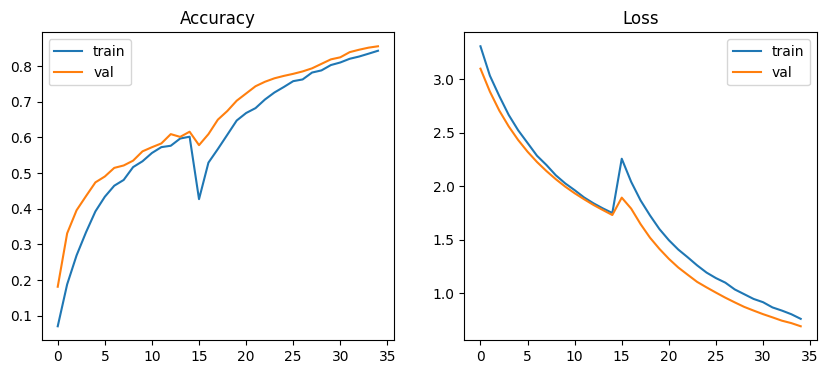

In [16]:
def plot_history(h1, h2):
    acc = h1.history['accuracy'] + h2.history['accuracy']
    val_acc = h1.history['val_accuracy'] + h2.history['val_accuracy']
    loss = h1.history['loss'] + h2.history['loss']
    val_loss = h1.history['val_loss'] + h2.history['val_loss']

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(acc, label="train")
    plt.plot(val_acc, label="val")
    plt.title("Accuracy")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(loss, label="train")
    plt.plot(val_loss, label="val")
    plt.title("Loss")
    plt.legend()
    plt.show()

plot_history(history1, history2)

In [21]:
val_loss, test_acc = modelV.evaluate(test_ds)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 195ms/step - accuracy: 0.7384 - loss: 1.2611
Final Test Accuracy: 76.72%


In [22]:
# from tensorflow import keras

# # Load the model
# model = keras.models.load_model("/content/drive/MyDrive/bird_classifier_v4.keras")
# model.summary()